<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw12_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

**Part 1: find $\mathbb{E}[\hat v_{10}^2]$ for OMC**

In [0]:
#define function h(x)
def vhat_sq_fcn(m):
  init_sum = 0 #initialize summation
  for i in range(m):
    z = np.random.normal(0,1)#generate random z
    if z < -2.:
      init_sum = init_sum + 1#sum add 1 when indicator function returns 1
  vhat = init_sum / 10#find mean of the sum
  vhatsq = vhat**2#square vhat
  return vhatsq

In [0]:
def omc_fcn(m, n):
  vec = np.zeros(n)#initialize sample
  for i in range(len(vec)):
    vec[i] = vhat_sq_fcn(m)#one vhat_sq value
    
  return vec

In [5]:
#OMC trials: m=10 for all
trial1 = omc_fcn(10, 500)
mean1 = trial1.mean()
trial2 = omc_fcn(10, 1000)
mean2 = trial2.mean()
trial3 = omc_fcn(10, 2000)
mean3 = trial3.mean()
trial4 = omc_fcn(10, 100000)
mean4 = trial4.mean()
#print(trial1)
#print(trial2)
#print(trial3)
print(mean1)
print(mean2)
print(mean3)
print(mean4)

0.0026400000000000004
0.00286
0.0027400000000000002
0.002765700000000001


OMC result is about 0.0027 for $\mathbb{E}[\hat v_{10}^2]$

**Part 2: find $\mathbb{E}[\hat v_{10}^2]$ for IS with $b=2$**

In [0]:
def vhat_sq_is(b, m):
  init_sum = 0 #initialize summation
  for i in range(m):
    x = np.random.normal(-b,1)#generate random x where x ~ N(-b,1)
    if x < -2.:
      init_sum = init_sum + np.exp(x * b)#sum add value when indicator function returns 1
  vhat = np.exp(b**2 / 2) * (init_sum / 10)#find mean of the sum and multiply
  vhatsq = vhat**2#square vhat
  return vhatsq

In [0]:
def is_fcn(b, m, n):
  vec = np.zeros(n)#initialize sample
  for i in range(len(vec)):
    vec[i] = vhat_sq_is(b, m)#one vhat_sq value
    
  return vec

In [8]:
#OMC trials: b=2, m=10 for all
trial1 = is_fcn(2, 10, 500)
mean1 = trial1.mean()
trial2 = is_fcn(2, 10, 1000)
mean2 = trial2.mean()
trial3 = is_fcn(2, 10, 2000)
mean3 = trial3.mean()
trial4 = is_fcn(2, 10, 100000)
mean4 = trial4.mean()
#print(trial1)
#print(trial2)
#print(trial3)
print(mean1)
print(mean2)
print(mean3)
print(mean4)

0.0005953205168427356
0.0006342784565447105
0.0006237450287893533
0.0006370802612828864


IS result is about 0.0006 for $\mathbb{E}[\hat v_{10}^2]$ for $b=2$

**Part 3: What b makes IS most efficient?**

From class notes we have the true expectation is 

$$v = N(-2) \approx 0.02275$$

We know that the MSE can be written as

$$MSE = Var + Bias^2$$

We also know that the estimator $\hat v_{10}$ is an unbiased estimator of $v$ (class notes). Thus

$$Bias(\hat v_{10} - v) = 0$$

and

$$MSE = Var(\hat v_{10}) = E[\hat v_{10}^2] - (E[\hat v_{10}])^2$$

since $\hat v_{10}$ is unbiased the expected value should be the true value, i.e.,

$$E[\hat v_{10}] = N(-2) \approx 0.02275$$

so we can rewrite MSE as

$$MSE = Var(\hat v_{10}) = E[\hat v_{10}^2] - (0.02275)^2=E[\hat v_{10}^2] - 0.000517565$$

thus to minimize MSE, we want value of $E[\hat v_{10}^2]$ to be at or close to $0.000517565$.

This can be done numerically.

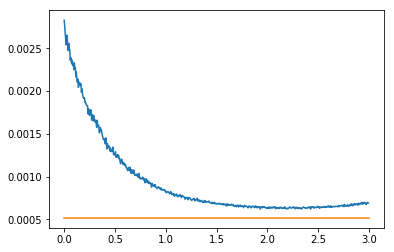

In [21]:
bvec = np.arange(0,3,0.005)
#print(b[2])
#print(len(b))
vhat = np.zeros(len(b))
#print(vhat)
#print(vhat[4])
for i in range (len(vhat)):
  vhat[i] = is_fcn(bvec[i], 10, 10000).mean()
vtrue = np.zeros(len(b))
for i in range(len(vtrue)):
  vtrue[i] = (ss.norm.cdf(-2))**2
plt.plot(bvec, vhat)
plt.plot(bvec, vtrue)

In [30]:
a = np.argwhere( bvec == 0.01)
print(a)

[[2]]


minimum at b=[[2.425]] with error of 0.00010280980437470946


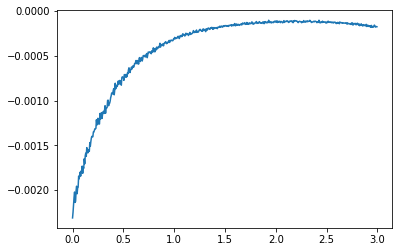

In [33]:
err = vtrue - vhat
plt.plot(bvec, vtrue-vhat)
minerr = max(err)
minerrb = b[np.argwhere(err == minerr)]
print('minimum at b=' + str(minerrb) + ' with error of ' + str(-minerr))